In [46]:
import pandas as pd


In [47]:
df=pd.read_csv('data.csv')

In [48]:
df.shape

(3000, 21)

In [ ]:
df.head()

,timestamp,device_id,location,temperature,humidity,vibration_level,inventory_status,stock_quantity,order_id,order_placed_date,...,actual_delivery_date,supplier_id,supplier_rating,logistics_partner,shipment_status,social_media_feed,news_alert,weather_condition,system_log_message,manual_risk_label
0,2024-03-27 11:21:41,sensor_2,Hub_C,27.48,48.62,1.98,in-stock,188,ORD5506,2024-03-19 11:21:41,...,2024-03-29 11:21:41,SUP_117,2.78,DHL,delivered,Supply chain normal,Stable market,sunny,System normal,0
1,2025-02-27 14:22:08,sensor_6,Hub_C,24.53,40.71,0.61,in-stock,359,ORD7912,2025-02-22 14:22:08,...,2025-03-02 14:22:08,SUP_111,1.08,FedEx,in-transit,Supply chain normal,Stable market,sunny,System normal,0
2,2025-01-27 12:30:19,sensor_39,Warehouse_A,22.10,44.75,0.30,in-stock,459,ORD4257,2025-01-12 12:30:19,...,2025-01-29 12:30:19,SUP_153,1.03,FedEx,delayed,Supply chain normal,Stable market,sunny,System normal,0
3,2025-04-02 16:42:30,sensor_18,Warehouse_A,25.11,45.72,0.77,in-stock,475,ORD3615,2025-03-22 16:42:30,...,2025-04-22 16:42:30,SUP_135,1.93,FedEx,in-transit,Possible delay reported,Minor strikes reported,rainy,Warning threshold exceeded,1
4,2024-09-18 10:34:37,sensor_7,Warehouse_A,26.11,42.32,0.72,in-stock,243,ORD7224,2024-09-12 10:34:37,...,2024-09-20 10:34:37,SUP_144,1.19,UPS,in-transit,Supply chain normal,Stable market,sunny,System normal,0


In [63]:
df['system_log_message'].unique()

array([1, 2, 0])

In [50]:
df.drop(['timestamp', 'device_id', 'order_id', 'order_placed_date',
         'supplier_id'],
        axis=1, inplace=True)


In [51]:
df.head()

,location,temperature,humidity,vibration_level,inventory_status,stock_quantity,expected_delivery_date,actual_delivery_date,supplier_rating,logistics_partner,shipment_status,social_media_feed,news_alert,weather_condition,system_log_message,manual_risk_label
0,Hub_C,27.48,48.62,1.98,in-stock,188,2024-03-29 11:21:41,2024-03-29 11:21:41,2.78,DHL,delivered,Supply chain normal,Stable market,sunny,System normal,0
1,Hub_C,24.53,40.71,0.61,in-stock,359,2025-02-28 14:22:08,2025-03-02 14:22:08,1.08,FedEx,in-transit,Supply chain normal,Stable market,sunny,System normal,0
2,Warehouse_A,22.10,44.75,0.30,in-stock,459,2025-02-01 12:30:19,2025-01-29 12:30:19,1.03,FedEx,delayed,Supply chain normal,Stable market,sunny,System normal,0
3,Warehouse_A,25.11,45.72,0.77,in-stock,475,2025-04-05 16:42:30,2025-04-22 16:42:30,1.93,FedEx,in-transit,Possible delay reported,Minor strikes reported,rainy,Warning threshold exceeded,1
4,Warehouse_A,26.11,42.32,0.72,in-stock,243,2024-09-21 10:34:37,2024-09-20 10:34:37,1.19,UPS,in-transit,Supply chain normal,Stable market,sunny,System normal,0


In [52]:
df['expected_delivery_date']=pd.to_datetime(df['expected_delivery_date'])
df['actual_delivery_date'] = pd.to_datetime (df['actual_delivery_date'])
df['delivery_delay_days'] = (df['actual_delivery_date']-df ['expected_delivery_date']).dt.days

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                3000 non-null   object        
 1   temperature             3000 non-null   float64       
 2   humidity                3000 non-null   float64       
 3   vibration_level         3000 non-null   float64       
 4   inventory_status        3000 non-null   object        
 5   stock_quantity          3000 non-null   int64         
 6   expected_delivery_date  3000 non-null   datetime64[ns]
 7   actual_delivery_date    3000 non-null   datetime64[ns]
 8   supplier_rating         3000 non-null   float64       
 9   logistics_partner       3000 non-null   object        
 10  shipment_status         3000 non-null   object        
 11  social_media_feed       3000 non-null   object        
 12  news_alert              3000 non-null   object  

In [54]:
df.drop(['expected_delivery_date', 'actual_delivery_date'], axis=1, inplace=True)
cat_cols = ['location', 'inventory_status', 'logistics_partner', 'shipment_status', 'weather_condition']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)






In [55]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['social_media_feed', 'news_alert', 'system_log_message']

encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df[cols_to_encode].head()


,social_media_feed,news_alert,system_log_message
0,2,2,1
1,2,2,1
2,2,2,1
3,0,0,2
4,2,2,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature                 3000 non-null   float64
 1   humidity                    3000 non-null   float64
 2   vibration_level             3000 non-null   float64
 3   stock_quantity              3000 non-null   int64  
 4   supplier_rating             3000 non-null   float64
 5   social_media_feed           3000 non-null   int32  
 6   news_alert                  3000 non-null   int32  
 7   system_log_message          3000 non-null   int32  
 8   manual_risk_label           3000 non-null   int64  
 9   delivery_delay_days         3000 non-null   int64  
 10  location_Port_B             3000 non-null   int32  
 11  location_Warehouse_A        3000 non-null   int32  
 12  inventory_status_low        3000 non-null   int32  
 13  logistics_partner_DHL       3000 

In [57]:
from sklearn.model_selection import train_test_split
X = df.drop('manual_risk_label', axis=1)
y = df['manual_risk_label']
X_train, X_test, y_train, y_test = train_test_split(
X, y,)
test_size=0.2,
random_state=42,
stratify=y
print(X_train.shape, X_test.shape)


(2250, 19) (750, 19)


In [58]:
X_train

,temperature,humidity,vibration_level,stock_quantity,supplier_rating,social_media_feed,news_alert,system_log_message,delivery_delay_days,location_Port_B,location_Warehouse_A,inventory_status_low,logistics_partner_DHL,logistics_partner_FedEx,logistics_partner_UPS,shipment_status_delivered,shipment_status_in-transit,weather_condition_storm,weather_condition_sunny
783,26.39,49.78,0.99,105,2.12,2,2,1,0,0,0,0,0,1,0,1,0,0,1
2944,22.21,48.21,1.38,230,3.62,2,2,1,17,0,1,0,1,0,0,0,1,0,1
802,29.01,59.77,0.32,186,1.72,2,2,1,4,0,0,0,0,1,0,1,0,0,1
2818,26.09,50.66,5.74,400,2.92,0,0,2,7,0,0,0,0,0,0,1,0,0,0
2619,21.04,38.07,0.63,80,3.19,2,2,1,6,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,23.45,57.66,0.94,250,1.06,2,2,1,-3,0,1,0,0,0,1,1,0,0,1
150,16.85,55.52,1.21,152,3.88,2,2,1,-2,0,1,0,0,0,1,0,1,0,1
1868,14.96,55.69,0.43,35,3.70,0,0,2,8,0,1,1,0,0,1,1,0,0,0
1126,27.68,55.53,4.04,73,1.86,0,0,2,16,0,1,0,0,1,0,0,0,0,0


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
rf= RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_predrf =rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predrf))
print(classification_report(y_test, y_predrf))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       489
           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00        11

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [60]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=42,class_weight='balanced',multi_class='multinomial',max_iter=1000)
lr.fit(X_train, y_train)
y_predlr =lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predlr))
print(classification_report(y_test, y_predlr))


C:\Users\poloj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       489
           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00        11

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



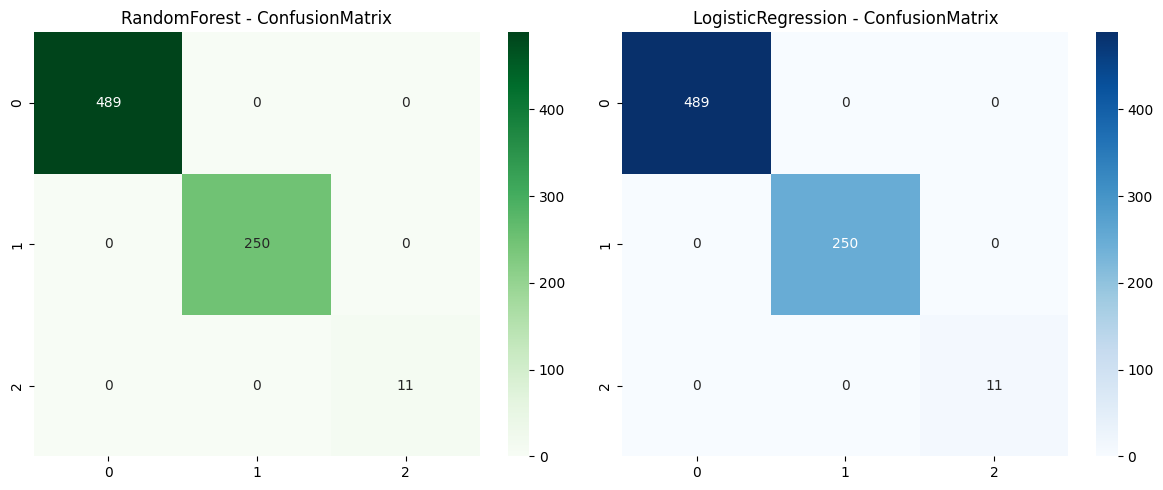

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

rf_conf_matrix = confusion_matrix(y_test, y_predrf)
lr_conf_matrix = confusion_matrix(y_test, y_predlr)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('RandomForest - ConfusionMatrix')

sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('LogisticRegression - ConfusionMatrix')

plt.tight_layout()
plt.show()
